In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random as rand
import seaborn as sns
import pandas as pd

In [2]:
def leeFunciones(nombreFichero):
    funciones = np.genfromtxt(nombreFichero, dtype = float, usecols=0, unpack=True)
    funcionesStr = np.genfromtxt(nombreFichero, dtype = str, usecols=1, unpack=True)
    return funciones, funcionesStr

def convertirACadena(num):
    return '{:032b}'.format(int(num))

def convEnt(num):
    return '{:05b}'.format(int(num))

def generaComplementarias(numero):
    generados = 0
    funcComp = []
    while generados < numero:
        funcRand = rand.randint(0, 2**32-1)
        if funcRand not in funciones:
            funcComp.append(funcRand)
            generados += 1
    return funcComp

def normaliza(valores, minimo, maximo):
    return (valores - minimo) /(maximo - minimo)

def muestraDistribucionesPuntuacion(puntuacionesDataSet, puntuacionesComp, titulo):
    plt.figure(1)
    plt.hist(puntuacionesDataSet, bins='auto', alpha = 0.5, label='Puntuación del dataset')
    plt.hist(puntuacionesComp, bins='auto', alpha = 0.5, label='Puntuación del complementario')
    plt.title(titulo)
    plt.xlabel("Puntuación de distinción de pares")
    plt.ylabel("Nº veces con esa puntuacion")
    plt.legend(loc = 'upper right')
    plt.savefig(titulo + '.pdf')
    plt.show()


def cerosFuncion(funcion):
    return [i for i in range(32) if funcion[i] == '0']

def unosFuncion(funcion):
    return [i for i in range(32) if funcion[i] == '1']

def diferenciaPar(par1,par2):
    diferencias1 = ""
    diferencias2 = ""
    contexto = ""
    posiciones = []
    for i in range(len(par1)):
        if par1[i] != par2[i]:
            diferencias1 += par1[i]
            diferencias2 += par2[i]
            posiciones.append(i)
        else:
            contexto += par1[i]
    return diferencias1, diferencias2, posiciones, par1, par2, contexto

def coincidencia(cad1,cad2):
    return sum(map(lambda x,y: x==y, cad1, cad2))

def distParesCruzadosFuncion(funcion, cuentaLong = False, muestra = False, igualdadContexto = False):
    if muestra:
        print('Funcion:', funcion)
    saca0 = cerosFuncion(funcion)
    saca1 = unosFuncion(funcion)
    punt = 0
    distintosAlMenos2 = []
    for fun0 in saca0:
        for fun1 in saca1:
            foco1, foco2, pos, par1, par2, contexto = diferenciaPar(convEnt(fun0),convEnt(fun1))
            distintosAlMenos2.append((foco1,foco2,pos,par1,par2,contexto))
    cruces = 0
    for i in range(len(distintosAlMenos2)):
        foco1, foco2, pos, par1, par2, contexto = distintosAlMenos2[i]
        for j in range(i+1, len(distintosAlMenos2)):
            foco12, foco22, pos2, par12, par22, contexto2 = distintosAlMenos2[j]
            if foco1 == foco22 and foco2 == foco12 and pos == pos2:
                if muestra:
                    print(foco1, foco2, pos, par1, par2, par12, par22)
                if cuentaLong:
                    cruces += 5-len(foco1)
                else:
                    cruces += 1
                if igualdadContexto:
                    cruces += coincidencia(contexto,contexto2)/len(contexto)
                if muestra:
                    print("Contexto1:", contexto, "Contexto2:", contextobis)
    if muestra:
        print("Puntuacion:", cruces)
    return cruces

def distParesCruzados(funciones, cuentaLong = False, muestra = False, igualdadContexto = False):
    return np.array([distParesCruzadosFuncion(convertirACadena(funcion), cuentaLong, muestra, igualdadContexto) for funcion in funciones])

In [5]:
funciones,_  = leeFunciones('/content/drive/MyDrive/TFG/funcionesSinRepeticion.txt')

In [6]:
nMuestras = 2000
muestraData = np.random.choice(funciones, nMuestras)
puntuacionesDifData = distParesCruzados(muestraData)
muestraComp = generaComplementarias(nMuestras)
puntuacionesDifComp = distParesCruzados(muestraComp)

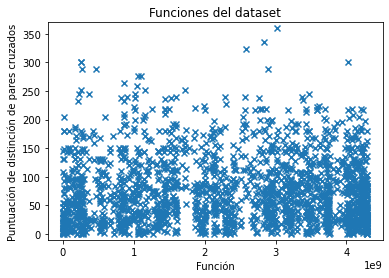

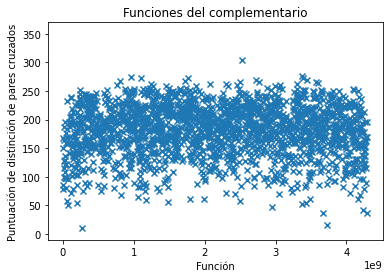

In [7]:
ySup = max(np.max(puntuacionesDifData), np.max(puntuacionesDifComp))
yInf = min(np.min(puntuacionesDifData), np.min(puntuacionesDifComp))
plt.title("Funciones del dataset")
plt.xlabel('Función')
plt.ylabel('Puntuación de distinción de pares cruzados')
plt.scatter(muestraData, puntuacionesDifData, marker = 'x')
plt.ylim([yInf-10, ySup+10])
plt.savefig('distParesCruzadosData.pdf')
plt.show()
plt.title("Funciones del complementario")
plt.xlabel('Función')
plt.ylabel('Puntuación de distinción de pares cruzados')
plt.scatter(muestraComp, puntuacionesDifComp, marker = 'x')
plt.ylim([yInf-10, ySup+10])
plt.savefig('distParesCruzadosComp.pdf')
plt.show()

In [8]:
mediaData = np.mean(puntuacionesDifData)
mediaComp = np.mean(puntuacionesDifComp)
ntest = 2000
muestraDataTest = np.random.choice(funciones, ntest)
puntuacionesDistTest = distParesCruzados(muestraDataTest)
porcentajeAciertosData = np.sum(np.abs(puntuacionesDistTest - mediaData) <= np.abs(puntuacionesDistTest - mediaComp))/ntest
print('Porcentaje de aciertos sobre el dataset: ', porcentajeAciertosData*100, '%')
muestraCompTest = generaComplementarias(ntest)
puntuacionesDistCompTest = distParesCruzados(muestraCompTest)
porcentajeAciertosComp = np.sum(np.abs(puntuacionesDistCompTest - mediaComp) <= np.abs(puntuacionesDistCompTest - mediaData))/ntest
print('Porcentaje de aciertos sobre el complementario: ', porcentajeAciertosComp*100, '%')


Porcentaje de aciertos sobre el dataset:  79.7 %
Porcentaje de aciertos sobre el complementario:  87.1 %


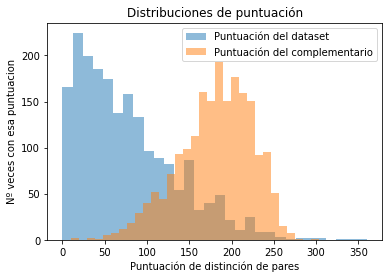

In [9]:
muestraDistribucionesPuntuacion(puntuacionesDifData, puntuacionesDifComp, 'Distribuciones de puntuación')

Métricas de distincion de pares cruzados con mejoras

In [10]:
nMuestras = 2000
muestraData = np.random.choice(funciones, nMuestras)
puntuacionesDifData = distParesCruzados(muestraData, cuentaLong = True, igualdadContexto = True)
muestraComp = generaComplementarias(nMuestras)
puntuacionesDifComp = distParesCruzados(muestraComp, cuentaLong = True, igualdadContexto = True)

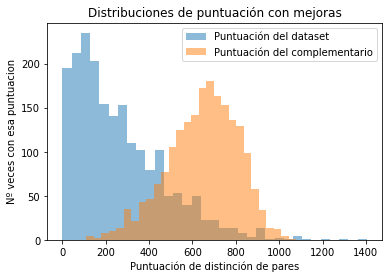

In [11]:
muestraDistribucionesPuntuacion(puntuacionesDifData, puntuacionesDifComp, 'Distribuciones de puntuación con mejoras')

In [12]:
mediaData = np.mean(puntuacionesDifData)
mediaComp = np.mean(puntuacionesDifComp)
ntest = 2000
muestraDataTest = np.random.choice(funciones, ntest)
puntuacionesDistTest = distParesCruzados(muestraDataTest, cuentaLong = True, igualdadContexto = True)
porcentajeAciertosData = np.sum(np.abs(puntuacionesDistTest - mediaData) <= np.abs(puntuacionesDistTest - mediaComp))/ntest
print('Porcentaje de aciertos sobre el dataset: ', porcentajeAciertosData*100, '%')
muestraCompTest = generaComplementarias(ntest)
puntuacionesDistCompTest = distParesCruzados(muestraCompTest, cuentaLong = True, igualdadContexto = True)
porcentajeAciertosComp = np.sum(np.abs(puntuacionesDistCompTest - mediaComp) <= np.abs(puntuacionesDistCompTest - mediaData))/ntest
print('Porcentaje de aciertos sobre el complementario: ', porcentajeAciertosComp*100, '%')


Porcentaje de aciertos sobre el dataset:  82.35 %
Porcentaje de aciertos sobre el complementario:  87.0 %
